In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv("C:\\Users\\hariharan\\Downloads\\AirBNB-1.csv")
df 

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
60204,9304836,Entire home/apt,6.0,2.5,flexible,True,f,100.0,3.0,3.0,6.437752
60205,17422489,Private room,2.0,1.0,strict,True,t,95.0,1.0,1.0,4.770685
60206,6357564,Entire home/apt,2.0,1.0,moderate,False,f,100.0,0.0,1.0,2.302585
60207,12957659,Entire home/apt,6.0,2.0,strict,True,f,94.0,3.0,3.0,5.347108


# IMPORT LIBRARIES  

In [5]:
import pandas as pd 
import seaborn as sns 
import matplotlib as plt 

# DATA INSPECTION 

In [7]:
print("Shape of the dataset: \n", df.shape)
print("Columns in the dataset: \n", df.columns)
print("\nFirst five rows of the dataset:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum()) 

Shape of the dataset: 
 (60209, 11)
Columns in the dataset: 
 Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

First five rows of the dataset:
          id        room_type  accommodates  bathrooms cancellation_policy  \
0   6901257  Entire home/apt           3.0        1.0              strict   
1   6304928  Entire home/apt           7.0        1.0              strict   
2   7919400  Entire home/apt           5.0        1.0            moderate   
3  13418779  Entire home/apt           4.0        1.0            flexible   
4   3808709  Entire home/apt           2.0        1.0            moderate   

  cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds  \
0         True                f                 100.0       1.0   1.0   
1         True                t                  93.0       3.0   3.0   
2         True

# Inference 
The dataset contains 60,209 rows and 11 columns with a mix of numerical and categorical features. It has some missing values, especially 
in columns like review_scores_rating, bathrooms, and bedrooms, which will need to be addressed. Categorical columns such as room_type, 
cancellation_policy, and cleaning_fee will require encoding, and numerical columns may need imputation or scaling. 

# DATA SUMMARIZATION 

In [12]:
# Summary statistics for numeric columns
print("\nNumeric Summary:\n", df.describe())

# Summary for categorical columns
categorical_summary = df.select_dtypes(include=['object']).describe()
print("\nCategorical Summary:\n", categorical_summary)

# Missing values
print("\nMissing Values:\n", df.isnull().sum())


Numeric Summary:
                  id  accommodates     bathrooms  review_scores_rating  \
count  6.020900e+04  60206.000000  60042.000000          46608.000000   
mean   1.127395e+07      3.153623      1.235935             94.087646   
std    6.080397e+06      2.156921      0.583414              7.814210   
min    3.440000e+02      1.000000      0.000000             20.000000   
25%    6.278513e+06      2.000000      1.000000             92.000000   
50%    1.226280e+07      2.000000      1.000000             96.000000   
75%    1.640707e+07      4.000000      1.000000            100.000000   
max    2.123090e+07     16.000000      8.000000            100.000000   

           bedrooms          beds     log_price  
count  60128.000000  60099.000000  60209.000000  
mean       1.266415      1.711426      4.781945  
std        0.852574      1.260071      0.717318  
min        0.000000      0.000000      0.000000  
25%        1.000000      1.000000      4.317488  
50%        1.000000    

# Inference 
The dataset has a wide range of numeric values, with properties varying in price, accomodates, and review ratings. Most categorical variables
are skewed, with "Entire home/apt" being the most common room type, and "strict" being the most frequent cancellation policy. 
Missing values are present, particularly in review_scores_rating, bathrooms, beds and bedrooms, which need to be addressed.

# DATA CLEANING

In [16]:
cleaned_data=df.copy() 
#room_type
cleaned_data['room_type'] = cleaned_data['room_type'].fillna(cleaned_data['room_type'].mode()[0])

#accommodates
cleaned_data['accommodates'] = cleaned_data['accommodates'].fillna(cleaned_data['accommodates'].median())

#bathrooms
cleaned_data['bathrooms'] = cleaned_data['bathrooms'].fillna(cleaned_data['bathrooms'].median())

#cancellation_policy 
cleaned_data['cancellation_policy'] = cleaned_data['cancellation_policy'].fillna(cleaned_data['cancellation_policy'].mode()[0])

#cleaning_fee 
cleaned_data['cleaning_fee'] = cleaned_data['cleaning_fee'].astype('bool')
cleaned_data['cleaning_fee'] = cleaned_data['cleaning_fee'].fillna(False)

#review_scores_rating 
cleaned_data['review_scores_rating'] = cleaned_data['review_scores_rating'].fillna(cleaned_data['review_scores_rating'].mean())

#bedrooms
cleaned_data['bedrooms'] = cleaned_data['bedrooms'].fillna(cleaned_data['bedrooms'].median())

# beds
cleaned_data['beds'] = cleaned_data['beds'].fillna(cleaned_data['beds'].median())

# Verify if all missing values 
print("\nMissing Values After Handling:\n", cleaned_data.isnull().sum()) 


Missing Values After Handling:
 id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64


In [18]:
cleaned_data.to_csv("cleaned_airbnb_data.csv", index=False)  

# Inference 
This code handles missing values in the dataset.Categorical columns like room_type and cancellation_policy are filled with mode .
Numerical columns like accommodates, bathrooms, bedrooms, beds, review_scores_rating are filled with medain .
Boolean column cleaning_fee  is converted to boolean type, and missing values are filled with False.
After applying these imputation , the dataset has no missing values. 

In [19]:
print(cleaned_data.head())  

         id        room_type  accommodates  bathrooms cancellation_policy  \
0   6901257  Entire home/apt           3.0        1.0              strict   
1   6304928  Entire home/apt           7.0        1.0              strict   
2   7919400  Entire home/apt           5.0        1.0            moderate   
3  13418779  Entire home/apt           4.0        1.0            flexible   
4   3808709  Entire home/apt           2.0        1.0            moderate   

   cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds  \
0          True                f            100.000000       1.0   1.0   
1          True                t             93.000000       3.0   3.0   
2          True                t             92.000000       1.0   3.0   
3          True                f             94.087646       2.0   2.0   
4          True                t             40.000000       0.0   1.0   

   log_price  
0   5.010635  
1   5.129899  
2   4.976734  
3   6.620073  
4   4.744932  


# UNIVARIANT ANALYSIS 

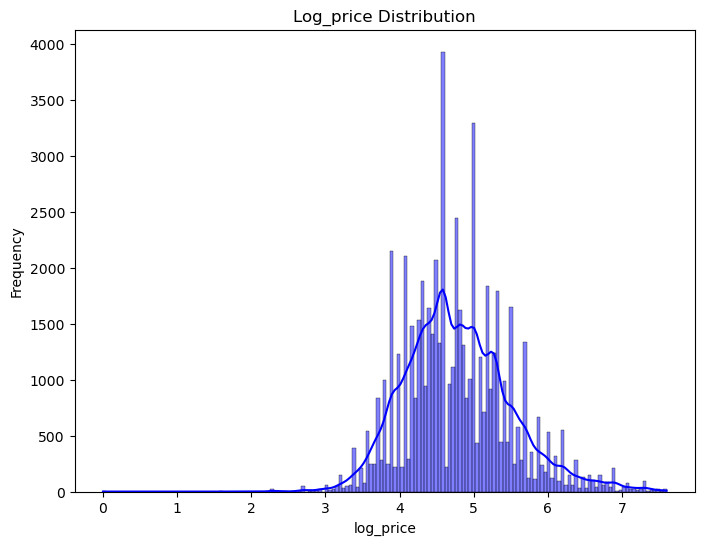

count    60209.000000
mean         4.781945
std          0.717318
min          0.000000
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of log_price
plt.figure(figsize=(8, 6))
sns.histplot(df['log_price'], kde=True, color='blue')
plt.title("Log_price Distribution") 
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print(df['log_price'].describe()) 

# Inference 
The Univariant analysis of log_price reveals that the data is fairly spread out with an average value of 4.78.
The histogram and KDE plot indicate a distribution with some concentration around the middle.
The prices range from 0 to 7.6, with 75% of the values falling between 4.32 and 5.22.
the standard deviation of 0.72 suggests moderate variation in the data. 
Overall, the log_price values show a relatively balanced distribution, with a few extreme values. 

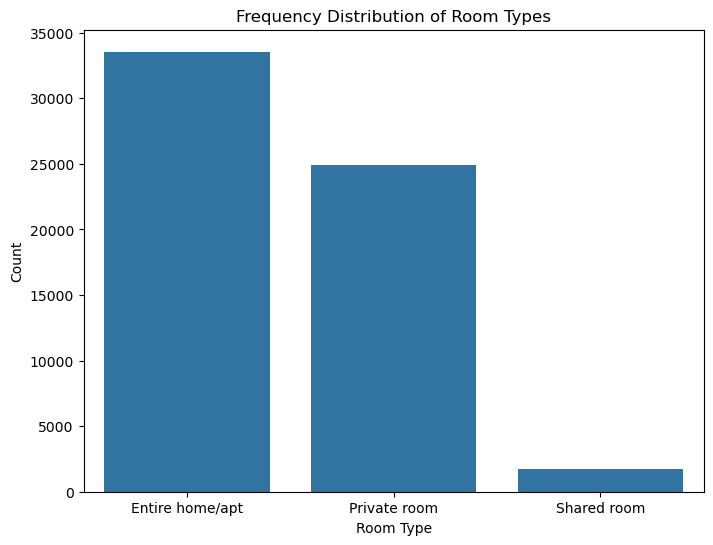

0    Entire home/apt
Name: room_type, dtype: object


In [23]:
# Bar plot of room_type
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='room_type')
plt.title('Frequency Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# Mode of room_type
print(df['room_type'].mode())  

# Inference 
The Univariant analysis of room_types generates a bar plot to visualize the frequency distribution.  
It shows the count of each room type in the dataset, with the most frequent room type being "Entire home/apt," 
and the least room type being "Shared room".

# BIVARIANT ANALYSIS 

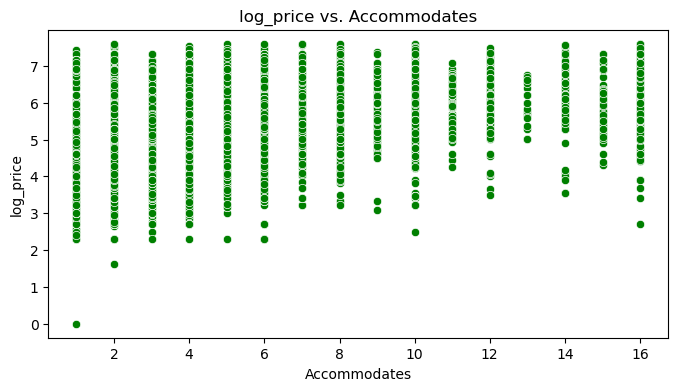

              log_price  accommodates
log_price      1.000000      0.568919
accommodates   0.568919      1.000000


In [41]:
# Scatter plot of log_price vs. accommodates
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='accommodates', y='log_price', color='green')
plt.title('log_price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('log_price')
plt.show()

# Correlation coefficient
print(df[['log_price', 'accommodates']].corr()) 

# Inference 
The Bivariant analysis  generates a scatter plot to visualize the relationship between log_price and accommodates. 
The correlation coefficient is calculated  to measure how strongly log_price and accommodates are related.
The value of 0.57 shows a moderate positive relationship, meaning that as the accommodation capacity increases, the log price tends to increase as 
well but with moderate strength.

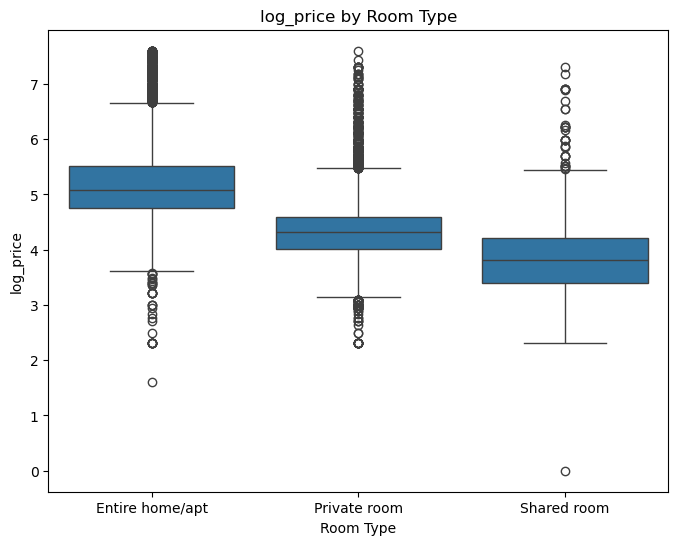

room_type
Entire home/apt    5.167976
Private room       4.326617
Shared room        3.855953
Name: log_price, dtype: float64


In [45]:
# Box plot of log_price by room_type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='room_type', y='log_price')
plt.title('log_price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('log_price')
plt.show()

# Group means
print(df.groupby('room_type')['log_price'].mean()) 

# Inference 
The Bivariant analysis creates a box plot to compare the distribution of log_price by  room_type. 
It shows that the Entire home/apt category has the highest median log_price, followed by Private room, and then Shared room. This suggests that properties with more space and privacy tend to have higher log-transformed prices.

cancellation_policy  flexible  moderate  strict
room_type                                      
Entire home/apt          7923      8576   17049
Private room             9635      6578    8697
Shared room               772       319     647


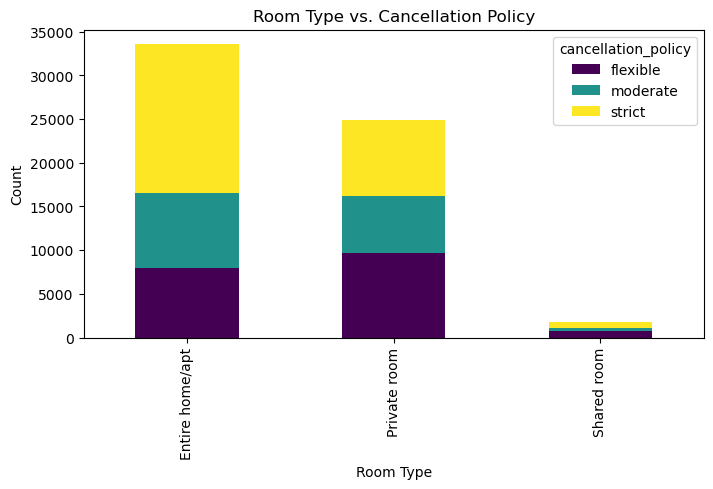

In [49]:
# Cross-tabulation
cross_tab = pd.crosstab(df['room_type'], df['cancellation_policy'])
print(cross_tab)

# Stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='viridis')
plt.title('Room Type vs. Cancellation Policy')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# Inference 
The cross-tabulation shows the distribution of cancellation_policy across different room_type categories. 
From the stacked bar chart, We can see that Entire home/apt has the highest number of listings for each cancellation policy, 
particularly the "strict" one. The Private room category has more listings with a "flexible" cancellation policy, 
while Shared room has the least listings overall, with "strict" being the most common policy
This indicates that stricter cancellation policies are more frequent for entire apartments.